# Guided Problems - Unsupervised Learning 

# PCA

### Load Dataset
We will be using the Iris dataset from sci-kit learn

In [37]:
#Import packages

from sklearn import preprocessing
from sklearn import datasets
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
#Load Iris dataset

df = datasets.load_iris()

In [52]:
#Create data and target datasets
#Note that these are default numpy arrays

X = df.data
y = df.target

### Basic EDA
Get a basic understanding of the data set (what our features and target variable(s) look like)

In [83]:
print(df.target_names)
print(df.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


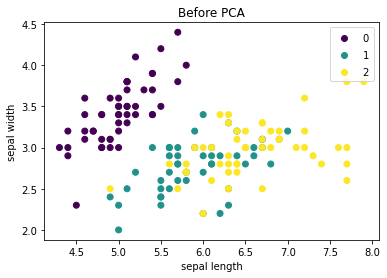

In [82]:
#Plot data
scatter = plt.scatter(X[:,0], X[:,1],c=y,label=df.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Before PCA')
plt.legend(*scatter.legend_elements())
plt.show()

In [48]:
#Convert to dataframe
X = pd.DataFrame(X)
X.columns = df.feature_names
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Scale data
This is important for PCA because the algorithm combines features

In [27]:
#Using standard scaler -> each feature on a standard normal distribution
scaler = preprocessing.StandardScaler().fit(X)

StandardScaler()

In [28]:
X_scaled = scaler.transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [25]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [26]:
X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Perform PCA

First, with four principal components to understand how many we need to explain most of the variance in the dataset.
How much variance is explained by each principal component?
What do these new principal components look like?
Which features are most important to each principal component?

In [29]:
#Create PCA model
pca = PCA()
pca.fit(X_scaled)

PCA()

In [30]:
#Default number of components is number of features, but confirming this:
pca.n_components_

4

In [31]:
#How much variance is explained by each principal component?
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [48]:
#What do the new components look like?
components_applied = pd.DataFrame(pca.transform(X_scaled))
components_applied

,0,1,2,3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [59]:
#Which features are most important to each principal component?
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

Re-run PCA with 2 principal components instead of 4.

In [32]:
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

In [34]:
#How much variance is explained?
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [33]:
#What do these new components look like?
pd.DataFrame(pca.transform(X_scaled))

,0,1
0,-7.533430,-4.842642
1,-7.523723,-5.842161
2,-7.698904,-5.655261
3,-7.625854,-5.922607
4,-7.596675,-4.754119
...,...,...
145,-3.894865,-4.993231
146,-4.258766,-6.092414
147,-4.123929,-5.122539
148,-4.094252,-4.738404


In [55]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

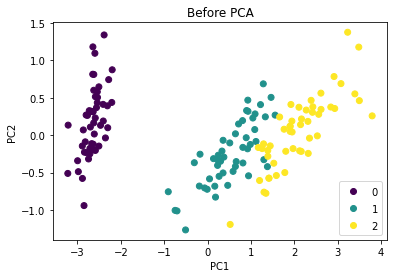

In [85]:
#Plot data
scatter = plt.scatter(X_new[:,0], X_new[:,1],c=y,label=df.target_names)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Before PCA')
plt.legend(*scatter.legend_elements())
plt.show()